In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np
import re
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [2]:
df = pd.read_csv('data/kc_house_data.csv')

In [3]:
# df_split = df.address.str.split(',')
# cities = []
# for x in df_split:
#     cities.append(x[1])
# pd.Series(cities)
# df['city'] = pd.Series(cities)

In [4]:
# # df['city'].sort_values(ascending=False)

# import re

# s = df['address'][1]
# result = re.search(', (.*?), ', s)
# print(result.group(1))

In [5]:
df = df.dropna()

In [6]:
df = df[(df.lat > 45) &
        (df.lat < 50) &
        (df.long > -124) &
        (df.long < -116)]

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29230 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             29230 non-null  int64  
 1   date           29230 non-null  object 
 2   price          29230 non-null  float64
 3   bedrooms       29230 non-null  int64  
 4   bathrooms      29230 non-null  float64
 5   sqft_living    29230 non-null  int64  
 6   sqft_lot       29230 non-null  int64  
 7   floors         29230 non-null  float64
 8   waterfront     29230 non-null  object 
 9   greenbelt      29230 non-null  object 
 10  nuisance       29230 non-null  object 
 11  view           29230 non-null  object 
 12  condition      29230 non-null  object 
 13  grade          29230 non-null  object 
 14  heat_source    29230 non-null  object 
 15  sewer_system   29230 non-null  object 
 16  sqft_above     29230 non-null  int64  
 17  sqft_basement  29230 non-null  int64  
 18  sqft_g

In [9]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,2.923000e+04,2.923000e+04,29230.000000,29230.000000,29230.000000,2.923000e+04,29230.000000,29230.000000,29230.000000,29230.000000,29230.000000,29230.000000,29230.000000,29230.000000,29230.000000
mean,4.538409e+09,1.112662e+06,3.435648,2.333031,2130.844064,1.709802e+04,1.518166,1825.680534,481.133767,336.310503,216.510195,1973.920424,93.529285,47.541309,-122.214196
std,2.881917e+09,8.950867e+05,0.977149,0.894210,976.575248,6.077165e+04,0.549536,879.977876,585.878928,286.159527,246.696079,31.682242,422.120363,0.159663,0.154909
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,45.479530,-122.849585
25%,2.093425e+09,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.429172,-122.328540
50%,3.876000e+09,8.670000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,1580.000000,0.000000,400.000000,144.000000,1976.000000,0.000000,47.557585,-122.234508
75%,7.287100e+09,1.310000e+06,4.000000,3.000000,2640.000000,1.075400e+04,2.000000,2290.000000,960.000000,510.750000,310.000000,2001.000000,0.000000,47.672004,-122.127690
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,48.111504,-117.056550


In [10]:
df.corr()['price'].map(abs).sort_values(ascending=False)

price            1.000000
sqft_living      0.616801
sqft_above       0.546204
bathrooms        0.488011
sqft_patio       0.317374
bedrooms         0.291181
lat              0.277899
sqft_garage      0.267660
sqft_basement    0.246605
floors           0.198130
yr_built         0.105229
sqft_lot         0.086883
yr_renovated     0.085581
long             0.075081
id               0.030505
Name: price, dtype: float64

<AxesSubplot:>

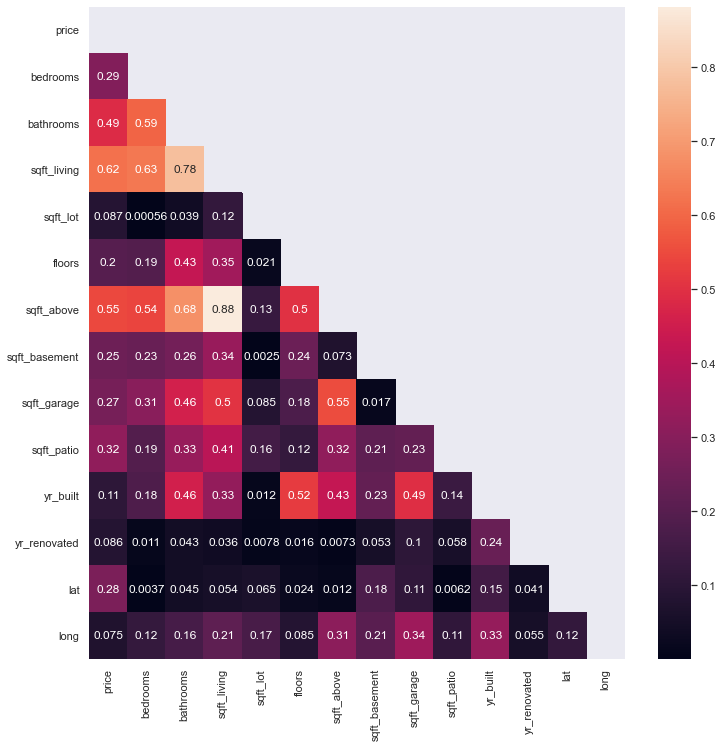

In [11]:
sns.set(rc={'figure.figsize':(12, 12)})

mask  = np.triu(np.ones_like(df.drop('id', axis=1).corr()))
sns.heatmap(abs(df.drop('id', axis=1).corr()), annot=True, mask=mask)

In [ ]:
sns.pairplot(data=df);

In [12]:
data_numerical = df._get_numeric_data()
data_numerical

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
0,7399300360,675000.0,4,1.0,1180,7140,1.0,1180,0,0,40,1969,0,47.461975,-122.19052
1,8910500230,920000.0,5,2.5,2770,6703,1.0,1570,1570,0,240,1950,0,47.711525,-122.35591
2,1180000275,311000.0,6,2.0,2880,6156,1.0,1580,1580,0,0,1956,0,47.502045,-122.22520
3,1604601802,775000.0,3,3.0,2160,1400,2.0,1090,1070,200,270,2010,0,47.566110,-122.29020
4,8562780790,592500.0,2,2.0,1120,758,2.0,1120,550,550,30,2012,0,47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,1555000.0,5,2.0,1910,4000,1.5,1600,1130,0,210,1921,0,47.664740,-122.32940
30151,194000695,1313000.0,3,2.0,2020,5800,2.0,2020,0,0,520,2011,0,47.565610,-122.38851
30152,7960100080,800000.0,3,2.0,1620,3600,1.0,940,920,240,110,1995,0,47.610395,-122.29585
30153,2781280080,775000.0,3,2.5,2570,2889,2.0,1830,740,480,100,2006,0,47.449490,-122.18908


In [13]:
data_categorical = pd.DataFrame(df.select_dtypes("object")).drop(['date','address'], axis=1)
data_categorical.head()

,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system
0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC
1,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC
2,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC
3,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC
4,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC


In [14]:
cat_data = data_categorical[['waterfront', 'greenbelt', 'nuisance', 'heat_source', 'sewer_system']]
ordinal_data = data_categorical[['view', 'condition', 'grade']]

In [15]:
df['grade'].value_counts()

7 Average        11557
8 Good            8882
9 Better          3604
6 Low Average     2848
10 Very Good      1350
11 Excellent       402
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64

In [16]:
view_ord_cats = [['NONE', 'FAIR', 'AVERAGE', 'GOOD', 'EXCELLENT']]
condition_ord_cats = [['Poor', 'Fair', 'Average', 'Good', 'Very Good']]
grade_ord_cats = [['2 Substandar','3 Poor', '4 Low', '5 Fair', '6 Low Average', '7 Average', '8 Good', '9 Better', '10 Very Good', '11 Excellent', '12 Luxury']]

In [18]:
view_ords = OrdinalEncoder(categories=view_ord_cats)
view_ords.fit(survey_preds)
view_ords.transform(survey_preds)

NameError: name 'survey_preds' is not defined

In [ ]:
cat_data

In [ ]:
ohe = OneHotEncoder(sparse=False)
ohe.fit(cat_data)
cat_encoded = ohe.transform(cat_data)


In [ ]:
cat_encoded

In [ ]:
pd.DataFrame(cat_encoded)

In [ ]:
concat_all = pd.concat([data_numerical, pd.DataFrame(cat_encoded)], axis=1)

concat_all.head()

In [ ]:
y = df['price']
X = sm.add_constant(df['sqft_living'])

results = sm.OLS(y,X).fit()
results.summary()

In [ ]:
sqft_pat_log = np.log(df['sqft_patio'])

In [ ]:
y = df['price']
X = sm.add_constant(df[['sqft_patio', 'bathrooms']])

results = sm.OLS(y,X).fit()
results.summary()

In [ ]:
results.summary().tables[1]

In [ ]:
dums = pd.get_dummies(df, drop_first=True)

In [ ]:
dums

In [ ]:
categprical = 